In [1]:
from matplotlib import animation
from functools import partial
from concurrent import futures
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy import signal
from IPython import display
import imageio

In [2]:
import os
os.sched_getaffinity(0) # numero de procesos que se pueden lanzar

{0, 1, 2, 3, 4, 5, 6, 7}

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

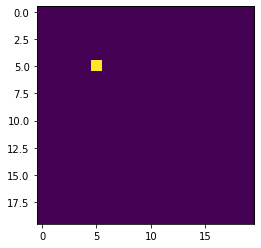

In [3]:
A = np.zeros((20, 20))
A[5, 5] = 1
print(A)

plt.imshow(A)

In [4]:
w = np.array([
    [0, 1, 0],
    [1,-4, 1],
    [0, 1, 0]
    ])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.01 0.96 0.01 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0

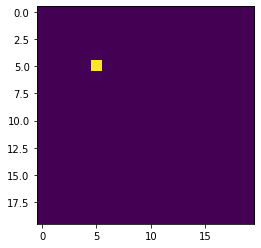

In [5]:
e = 0.01
A = A + e*(signal.correlate2d(A, w, mode = "same"))
print(A)
plt.imshow(A)


In [6]:
def func(i):
    #
    B = A.copy()
    for _ in range(i):
        e = 0.01
        B = B + e*(signal.correlate2d(B, w, mode = "same"))
        #return plt.imshow(B)
    ax.imshow(B)

    

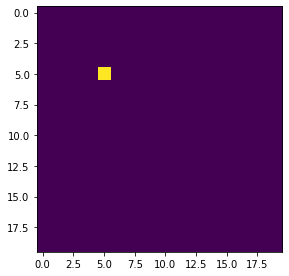

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def concentrar(A, altura = 0.1, factor = 20):
    m, n = A.shape
    radius = (min(m, n) - 1)//factor + 1
    h, k = m//2, n//2
    A[h-radius:h+radius, k-radius:k+radius] += altura
    

A = np.zeros((20, 20))
A[5, 5] = 1

fig, ax = plt.subplots()
fig.set_tight_layout(True)

anim = FuncAnimation(fig, func, frames = 100, interval = 1000/24)
#plt.show(vmin = 0.0, vmax = 1.0, cmap="red")


In [8]:
#display.display_html(anim.to_jshtml(), raw = True)


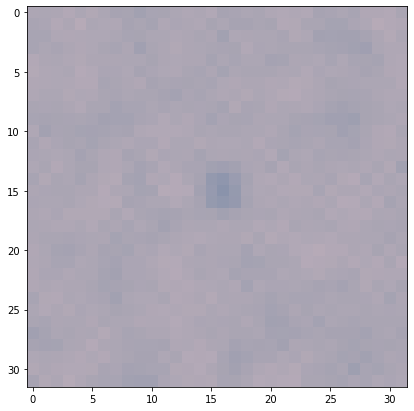

In [9]:
n, m, noise = 32, 32, 0.2
r1 = 0.5
r2 = 0.25
f, k = 0.055, 0.062


"""
valores posibles

f = 0.035, 0.055, 0.039
k = 0.057, .062, 0.065

"""

w = np.array([
    [0.05, .2, 0.05],
    [.2,-1, .2],
    [.05, .2, 0.05]
    ])


def concentrar(matriz, altura = 0.1, factor = 28):
    m, n = matriz.shape
    radius = (min(m, n) - 1)//factor + 1
    h, k = m//2, n//2
    matriz[h-radius:h+radius, k-radius:k+radius] += altura

    
A = np.ones((n, m), dtype=float)     # 
B = noise * np.random.random((n, m)) # 

concentrar(B)


def transicion(i):
    global A, B
    
    #for i in range(100):
    reaccion = A * B**2
    A += r1 + signal.correlate2d(A, w, mode = 'same', boundary = 'wrap') - reaccion + f * (1 - A)
    B += r2 + signal.correlate2d(B, w, mode = 'same', boundary = 'wrap') + reaccion - (f + k) * B
    ima.set_array(A)
    imb.set_array(B)


fig, ax = plt.subplots(figsize = (7, 7))
#im = ax.imshow(np.zeros((n, m)))
ima = ax.imshow(A, cmap='Reds', alpha = 0.5, vmin = 0.0, vmax = 1.0)
imb = ax.imshow(B, cmap='Blues', alpha = 0.5, vmin = 0.0, vmax = 1.0)
peli = FuncAnimation(fig, transicion, frames = 100)



In [10]:
display.display_html(peli.to_jshtml(), raw = True)

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in square
/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in multiply


Once 
 
 Loop 
 
 Reflect

In [11]:
n, p = 64, 0.6
A = (np.random.random(size = (n - 1, n)) <= p).astype(int)
A = np.vstack([[5]*n, A])

w = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
    ])

def percolacion(A):
    c = signal.correlate2d(A, w, mode = "same")
    A[(A == 1) & (c >= 5 )] = 5


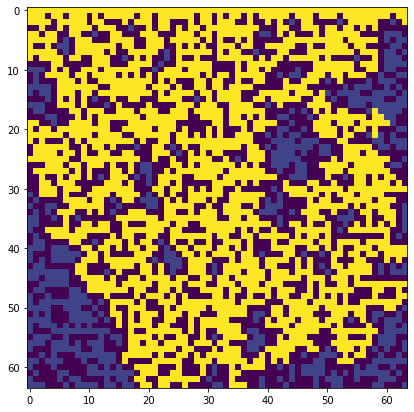

In [12]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.imshow(A)

for k in range(2 * n):
    percolacion(A)
    ax.imshow(A)

Once 
 
 Loop 
 
 Reflect

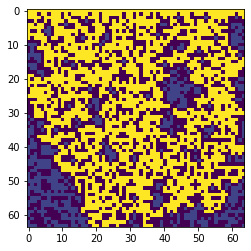

In [13]:
fig, ax = plt.subplots()
imagen = ax.imshow(A)
def actualizar(i):
    global A
    percolacion(A)
    imagen.set_array(A)
    return imagen

peli = FuncAnimation(fig, actualizar)
display.display_html(peli.to_jshtml(), raw = True)

In [16]:
w = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]
             ])

def simulacion(n, q, w = w):
    A = (np.random.random(size = (n - 1, n)) <= q).astype(np.int_)
    A = np.vstack([[5]*n, A])
    while True:
        c = signal.correlate2d(A, w, mode = "same")
        cambio = (A == 1) & (c >= 5 )
        if not np.any(cambio):
            return False
        A[cambio] = 5
        if np.any(A[n - 1] == 5):
            return True
        
def ejecuta_simulacion(n, q, w = w, iters = 100):
    func = partial(simulacion, q = q, w = w)
    with futures.ProcessPoolExecutor() as ejecutor:
        resultados = list(ejecutor.map(func, [n]*iters))
    return np.mean(resultados)     #([simulacion(n, q, w)for k in range(iters)])


In [17]:
n, q = 128, 0.59
ejecuta_simulacion(n, q)

0.45

In [18]:
lista = np.linspace(0., 1., num = 50)
proba = [ejecuta_simulacion(64, q) for q in lista]


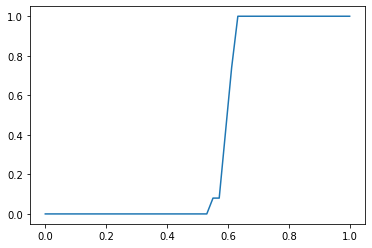

In [19]:
fig, ax = plt.subplots()
#plt.axvline(x = 0.6, color = "r")
ax.plot(lista, proba)

# **Simulacion**

In [20]:
def simulacion(n, q, w = w):
    A = (np.random.random(size = (n - 1, n)) <= q).astype(np.int_)
    A = np.vstack([[5]*n, A])

    while True:
        c = signal.correlate2d(A, w, mode = "same")
        cambio = (A == 1) & (c >= 5 )
        if not np.any(cambio):
            valor = np.sum(A == 5) - n
            return valor
        A[cambio] = 5
        if np.any(A[n - 1] == 5):
            valor = np.sum(A == 5) - n
            return valor

In [21]:
def genera_simulacion(s, t, w):

    X = []
    n = [i for i in range(s, t)]

    for j in n:
        n, q = j, 0.59
        for i in range(1, 6):
            tam = simulacion(n, q)
            X.append(tam)
    return X

In [22]:
s, t = 5, 128
w = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
    ])

X = genera_simulacion(s, t, w)

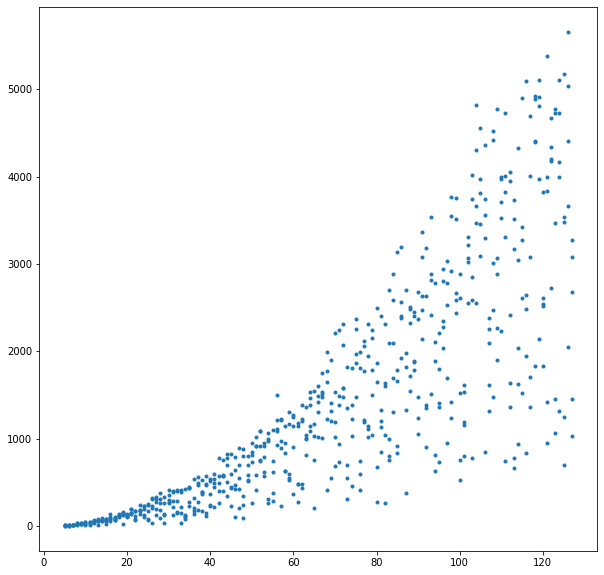

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot([i for i in range(s, t) for j in range(0,5)], X, ".")
#plt.axvline(x = 120, color = "r") 
#plt.axhline(y = 5000, color = "r")


[  5   5   5   5   5   6   6   6   6   6   7   7   7   7   7   8   8   8
   8   8   9   9   9   9   9  10  10  10  10  10  11  11  11  11  11  12
  12  12  12  12  13  13  13  13  13  14  14  14  14  14  15  15  15  15
  15  16  16  16  16  16  17  17  17  17  17  18  18  18  18  18  19  19
  19  19  19  20  20  20  20  20  21  21  21  21  21  22  22  22  22  22
  23  23  23  23  23  24  24  24  24  24  25  25  25  25  25  26  26  26
  26  26  27  27  27  27  27  28  28  28  28  28  29  29  29  29  29  30
  30  30  30  30  31  31  31  31  31  32  32  32  32  32  33  33  33  33
  33  34  34  34  34  34  35  35  35  35  35  36  36  36  36  36  37  37
  37  37  37  38  38  38  38  38  39  39  39  39  39  40  40  40  40  40
  41  41  41  41  41  42  42  42  42  42  43  43  43  43  43  44  44  44
  44  44  45  45  45  45  45  46  46  46  46  46  47  47  47  47  47  48
  48  48  48  48  49  49  49  49  49  50  50  50  50  50  51  51  51  51
  51  52  52  52  52  52  53  53  53  53  53  54  5

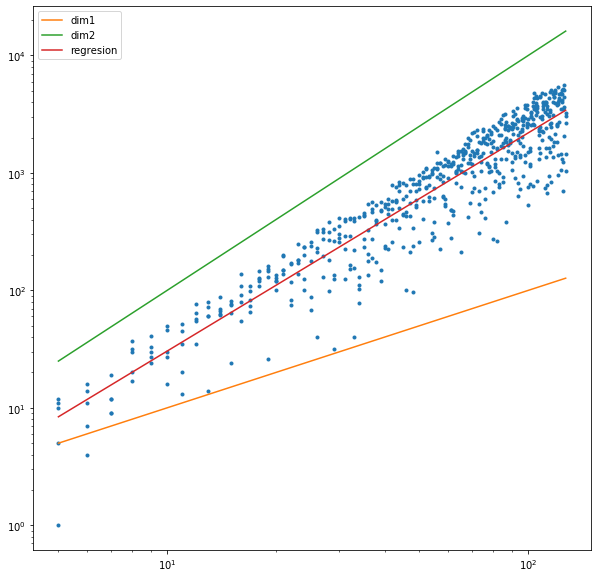

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot([i for i in range(s, t) for j in range(0, s)], X,".")

x = [i for i in range(s, t) for j in range(0, s)]
x = np.array(x)
print(x)
ax.plot(x, x, label='dim1')
ax.plot(x, x**2, label='dim2')

polinomio = np.polyfit(np.log(x), np.log(X), deg=1)
regresion = np.exp(np.polyval(polinomio, np.log(x)))

ax.plot(x, regresion, label="regresion")

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()


In [25]:
polinomio

array([ 1.85782092, -0.8628054 ])

In [26]:
from sklearn import svm
y = [i for i in x]

X = np.matrix(X).reshape(-1, 1)
y = np.matrix(y).reshape(-1, 1)

clf = svm.SVC(gamma = 'scale')
clf.fit(X, y)

/home/david/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
clf.predict([[20]])

array([7])